# data_test

notebook to check the structure of the dataset PTB-XL (https://physionet.org/content/ptb-xl/1.0.3/)

In [1]:
import os
import pandas as pd
import numpy as np
import wfdb

path = '/Users/nikolajhertz/Desktop/GIT/BACHELOR_THESIS/code/data/PTB_XL'


meta = pd.read_csv(os.path.join(path, 'ptbxl_database.csv'),  index_col='ecg_id')

[n1, p1] = meta.shape
print(f"meta is of shape {n1,p1}")

unknown = pd.read_csv(os.path.join(path, 'scp_statements.csv'), index_col=0)
[n2, p2] = unknown.shape
print(f"unknown is of shape {n2,p2}")


meta is of shape (21799, 27)
unknown is of shape (71, 12)


dictionary saved successfully to file


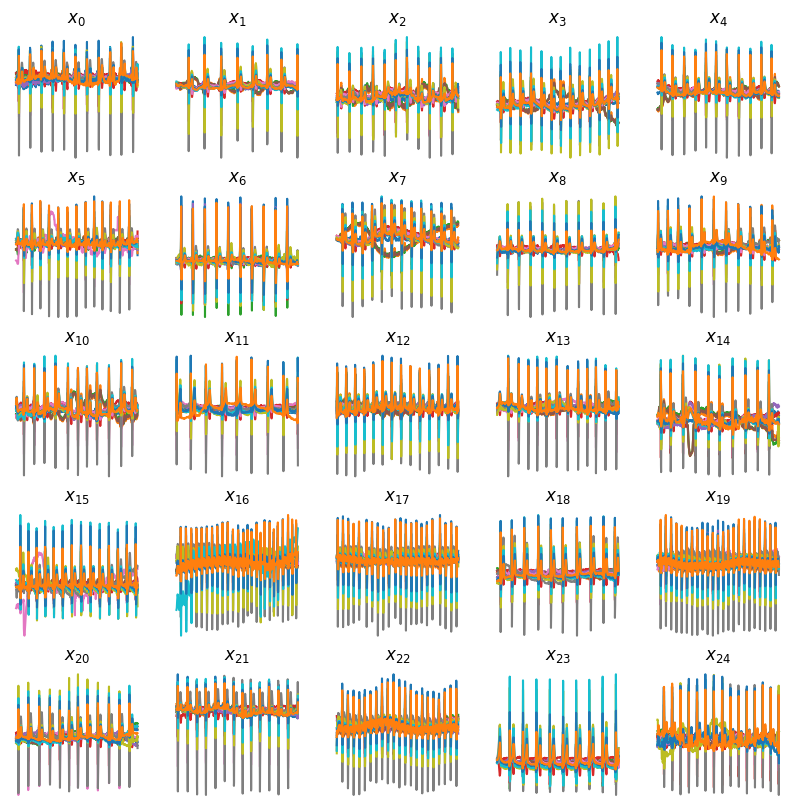

In [2]:
filenames = iter(meta.filename_lr)

import matplotlib.pyplot as plt


fig, axs = plt.subplots(5,5, figsize=(10,10))

axs = axs.flatten()


for i in range(25):
    xtest, meta_ = wfdb.rdsamp(os.path.join(path,next(filenames)))
    #print(meta_)
    axs[i].plot(xtest)
    axs[i].axis('off')
    axs[i].set_title("$x_{" + str(i) + "}$")
plt.show()
    

# dataloader

In [4]:
"""
Pytorch dataloader.
---
Maybe a bit too overkill, as the data can be loaded to memory without trouble
"""


import os
import pandas as pd


class PTB_XL(Dataset):
    def __init__(self, data_path, sampling_rate=100):
        """
        THIS DATASET IS INSPIRED BY THE 'example_physionet.py' PROVIDED BY THE DATA_COLLECTION TEAM OF PTB_XL

        
        data_path: path to folder PTB_XL/
        sampling_rate: amounts of sample per second
        """
        self.data_path = data_path
        self.sampling_rate = sampling_rate
        
        self.df = pd.read_csv(os.path.join(data_path, 'ptbxl_database.csv'))

        self.paths = self.df.filename_lr

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, idx):
        image_path = os.path.join(self.data_path, self.paths[idx])
        
        signal, meta = wfdb.rdsamp(image_path)

        return signal, meta

NameError: name 'Dataset' is not defined

In [20]:
# loading data at once

def load_raw_data(df, sampling_rate, path):
    # function from example_physionet.py
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data



path = '/Users/nikolajhertz/Desktop/GIT/BACHELOR_THESIS/code/data/PTB_XL/'
sampling_rate=100

# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

KeyboardInterrupt: 

In [4]:
X.shape

(21799, 1000, 12)

In [10]:
for col in Y.columns:
    print(Y[col])

ecg_id
1        15709.0
2        13243.0
3        20372.0
4        17014.0
5        17448.0
          ...   
21833    17180.0
21834    20703.0
21835    19311.0
21836     8873.0
21837    11744.0
Name: patient_id, Length: 21799, dtype: float64
ecg_id
1         56.0
2         19.0
3         37.0
4         24.0
5         19.0
         ...  
21833     67.0
21834    300.0
21835     59.0
21836     64.0
21837     68.0
Name: age, Length: 21799, dtype: float64
ecg_id
1        1
2        0
3        1
4        0
5        1
        ..
21833    1
21834    0
21835    1
21836    1
21837    0
Name: sex, Length: 21799, dtype: int64
ecg_id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
         ..
21833   NaN
21834   NaN
21835   NaN
21836   NaN
21837   NaN
Name: height, Length: 21799, dtype: float64
ecg_id
1        63.0
2        70.0
3        69.0
4        82.0
5        70.0
         ... 
21833     NaN
21834     NaN
21835     NaN
21836     NaN
21837     NaN
Name: weight, Length: 21799, dtype

In [21]:
import ast

In [22]:
# load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

# Load raw signal data
X = load_raw_data(Y, sampling_rate, path)

# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv(path+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [32]:
Y['diagnostic_superclass']

ecg_id
1        [NORM]
2        [NORM]
3        [NORM]
4        [NORM]
5        [NORM]
          ...  
21833    [STTC]
21834    [NORM]
21835    [STTC]
21836    [NORM]
21837    [NORM]
Name: diagnostic_superclass, Length: 21799, dtype: object

## FRONTPAGE

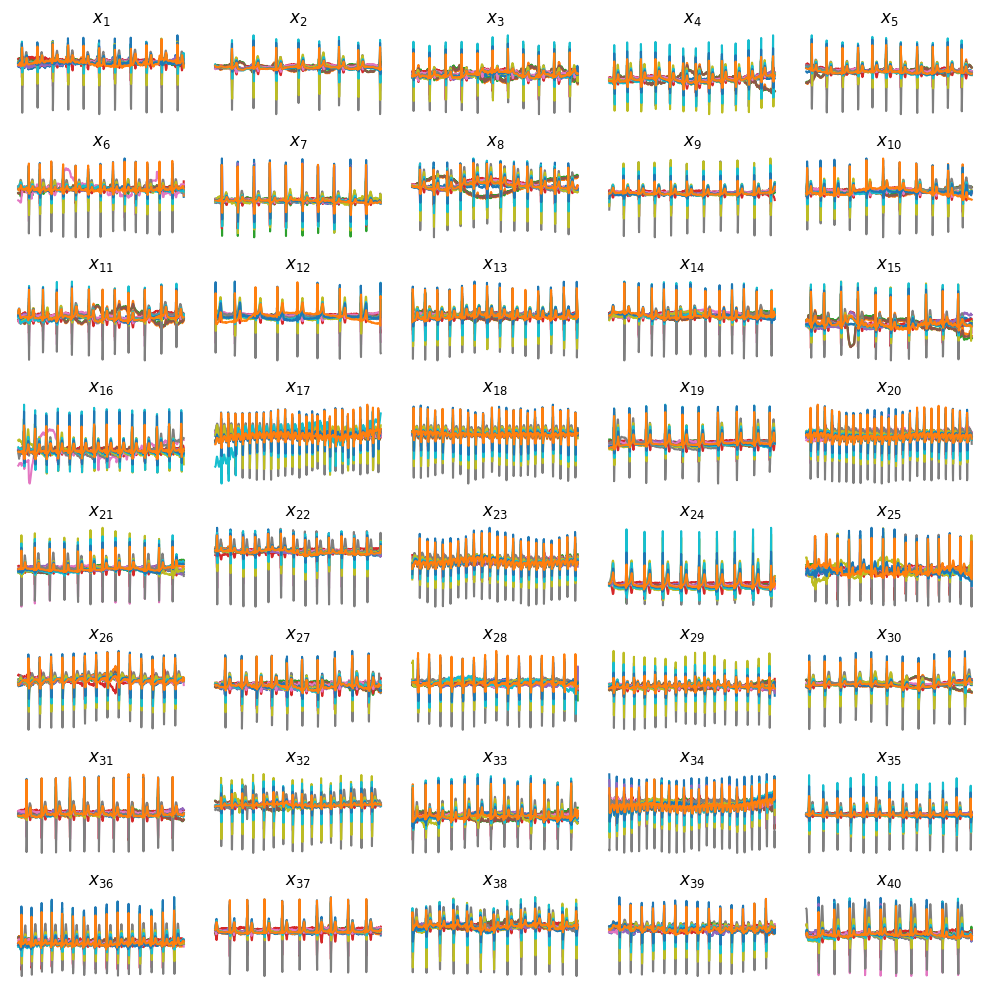

In [49]:
filenames = iter(meta.filename_lr)

import matplotlib.pyplot as plt


fig, axs = plt.subplots(8,5, figsize=(10,10))

axs = axs.flatten()


for i in range(40):
    xtest, meta_ = wfdb.rdsamp(os.path.join(path,next(filenames)))
    #print(meta_)
    axs[i].plot(xtest)
    axs[i].axis('off')
    axs[i].set_title("$x_{" + str(i+1) + "}$")
plt.tight_layout()

from matplotlib.patches import Rectangle

plt.savefig('../results/frontpage.png')
plt.show()
    

(1000, 1000, 4)


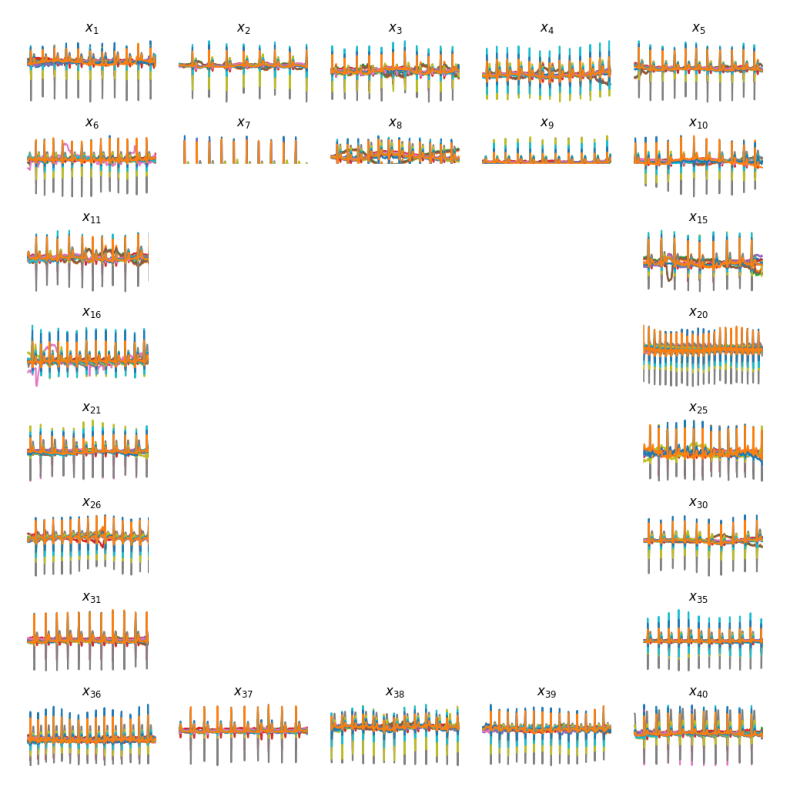

In [47]:

import skimage.io as io
from matplotlib.patches import Rectangle


img = io.imread('../results/frontpage.png')


fig, ax = plt.subplots(1,1, figsize=(10,10))

print(img.shape)
c, r, channels = img.shape

rect1 = Rectangle((c//2 - 320, r//2 - 300), 640, 660, alpha=1, color='w')

ax.imshow(img)
ax.axis('off')
ax.add_patch(rect1)
plt.savefig('../results/frontpage.png')
plt.show()

